# Decision Trees

## 1. Background

Decision Trees are widely used in Data Mining, Statistics,
and Machine Learning for classification and regression analysis.

As a simple example, consider deciding whether an individual would be able to complete a 10km openwater swim. We can use many features or atributes to aid our decision such as age, ability to swim, previous swimming experience, etc. Using this information we can "grow" a tree to help us decide.

<DIV align="center"><b align="center"><br />  Complete 10km swim?</b></DIV>

<img src="swim tree.png" height="700" width="700"/>

The root node represents the intial state of our data, each internal node of the tree corresponds to a decision about an attribute, and finally each leaf node corresponds to a class label. For example, at the first node we might want to consider whether a person knows how to swim in the first place. If the answer is "no", then we can safely assume that the person wouldn't be able to complete the 10km swim, on the other hand if the answer is "yes" then it's far more possible that the person would be able to complete the swim. A intuitive way to think about it is that the question "Does this person know how to swim?" provides us with a lot of information to make a decision, where as a question such as "How old is the person?" does not provide as much information for this particular problem.

A Decision Tree exploits structure in the data to create meaningful subsets of data and categorize data points. But given a large dataset with many features, how does it know which ones to use to split the data in a way that it helps us categorize it?

The general idea is that we want to apply a criterion to help us find the best feature to split the data. For categorical data we can use <b>Information Gain</b> as a criterion, and for continuous data <b>Gini Index</b> is generally used, attributes are assumed to be continuous.

## Information Gain

For categorical data, a common criterion for feature selection is information gain. The idea is that we want to select the features that provide the most information for splitting the data. Information gain is used by the ID3, C4.5 and C5.0 tree-generation algorithms, and it's based on the concept of entropy from information theory.

Entropy is defined as below


${\displaystyle H(T)=I_{E}(p_{1},p_{2},...,p_{n})=-\sum _{i=1}^{J}p_{i}\log _{2}^{}p_{i}}$

where 

${\displaystyle p_{1},p_{2},...}$are fractions that add up to 1 and represent the percentage of each class present in the child node that results from a split in the tree.
Information Gain = Entropy(parent) - Weighted Sum of Entropy(Children)


 $IG(T,a) = H(T) - H(T|a) $
 
The information gain is calculated for each feature, and the one with the highest information gain is selected to split the data. The process then repeats on the next node until all children nodes are "pure" (leading to leaves), or until the information gain is 0.

## Gini Impurity

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability $p_{i}$ of an item with label $i$ being chosen times the probability $1-p_{i}$ of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

To compute Gini impurity for a set of items with $J$ classes, suppose ${\displaystyle i\in \{1,2,...,J\}}$, and let 
$p_{i}$ be the fraction of items labeled with class $i$ in the set.

${\displaystyle I_{G}(p)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}=\sum _{i\neq k}p_{i}p_{k}}$

A more detailed discussion is given in this [video](https://www.youtube.com/watch?v=3kYujfDgmNk&index=12&list=PLE6Wd9FR--EdyJ5lbFl8UuGjecvVw66F6) by Nando de Freitas, and also in this wiki [article](https://en.wikipedia.org/wiki/Decision_tree_learning).


## 2. Decision Tree Classifier Example

In this example we use a decision tree to help us classify the `iris dataset`. 

The iris dataset consists of 150 samples: 50 from each of three species of Iris flowers, and four features for each sample (Sepal Length, Sepal Width, Petal Length and Petal Width).
Thus, the dataset consists of three classes, four features, and 150 samples (50 for each class).

We use all the data and use entropy as the criterion for feature selection.

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target
#X = X[:, :2] # using only two features
#y = y[y != 0] # use if you want to exclude a class

n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

# create training and testing sets
X_train, y_train = X[:int(.8 * n_sample)], y[:int(.8 * n_sample)]
X_test, y_test = X[int(.8 * n_sample):], y[int(.8 * n_sample):]
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

print("Accuracy:",sum(clf.predict(X_test)==y_test)/len(y_test),"\n")

Accuracy: 0.933333333333 



## Visualize Tree

Jul 28 13:19:48 Hanss-MacBook-Pro.local dot[2695] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Jul 28 13:19:48 Hanss-MacBook-Pro.local dot[2695] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.



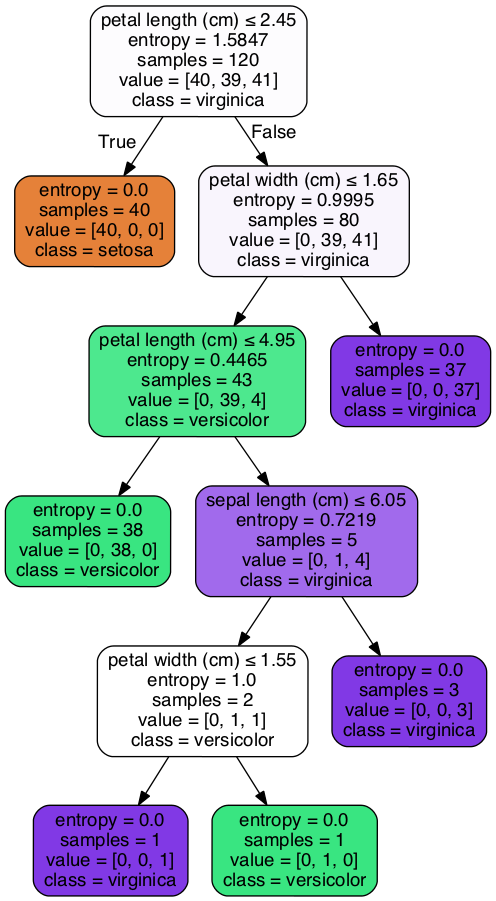

In [2]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


## Visualizing Decision Boundaries

Adapted from this [example](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html).

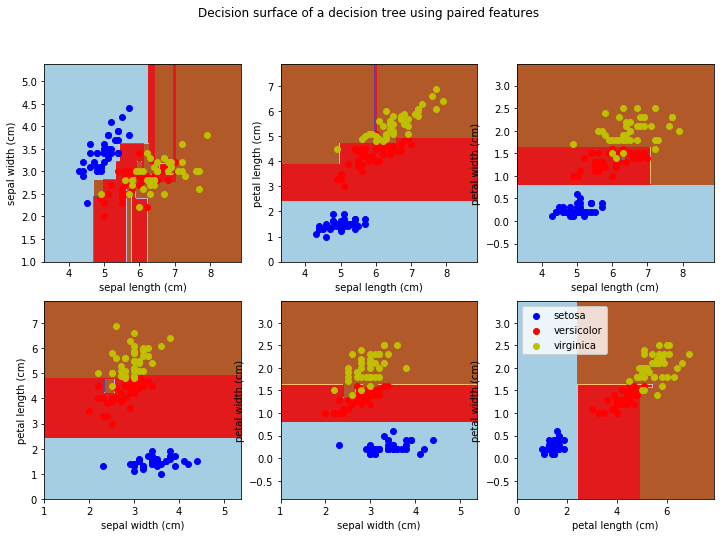

In [6]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    plt.figure(1, figsize=(12, 8))
    # We only take the two corresponding features
    X = X_train[:, pair]
    y = y_train

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Overall we can see that this classification method performed quite well achieving 93.3% accuracy rate.

Note, however, that here we used a single decision tree to classify the data based on a specific set of training data, 
but if we were to choose a different set of training data a different tree would be created.

One thing we could do to improve or predictive power is to use multiple decision trees trained on different datasets, then average across them
to classify the data. This would potentially decrease bias from specific training samples, and lead to more generalizable results. This is particularly useful in cases with a large (thousands) of features.

This is what Random Forest Classifers do.

## 3. Decision Tree Regression Example

As discussed earlier, decision trees are also capable of modelling a continuos variables.

In this example we use a decision tree regression model to predict data created from cosine function.

Inspired by this [example](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html).

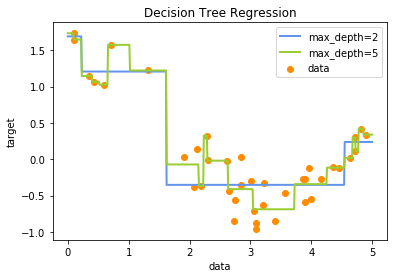

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1)) # create 40 random points and scale by 5 and sort them.
X_test = np.linspace(0, 5, 500)[:, np.newaxis] # split [0,5] into 500 intervals then put into single elements array
y = np.cos(X).ravel()+np.random.rand(40) # Create a target by taking the sine of X and adding some noise.

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

The decision trees is used to fit a noisy cosine curve. As a result, it learns local linear regressions approximating the cosine curve.
We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.